<a href="https://colab.research.google.com/github/amisha233/Data-science-project/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]
accuracy 1.0
precision 1.0


NameError: name 'ax' is not defined

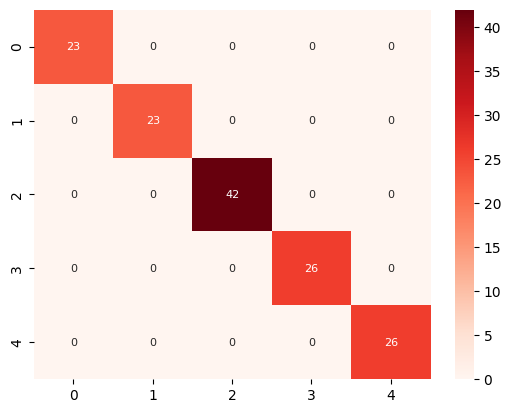

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline


df = pd.read_csv('/user_behavior_dataset.csv')
# print(df)
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
# print(df)

x = df[['Gender','Device Model','Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age']].values
y = df['User Behavior Class'].values

# # training,testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
# print(y_pred)
# print(y_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

# Logreg = LogisticRegression()
# # fit the model with data
# Logreg.fit(x_train,y_train)
# # prediction
# y_pred=Logreg.predict(x_test)
# print(y_pred)
# print(y_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)

precision = precision_score(y_test,y_pred, average='macro')
print("precision",precision)

# class_names= [0,1]
# fig,ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks,class_names)
# plt.yticks(tick_marks,class_names)
# print
# create headmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Reds",fmt="d",annot_kws={"size":8})
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title("confusion matrix", y=1.4)
plt.xlabel('actual label')
plt.ylabel('predicated labels')
plt.show